## Med 9 cobre L=22.7 --> esta es la medicion rara que hizo cobelli

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import pandas as pd

In [4]:
file_path = "C:/Users/FIUBA/Desktop/Labo 4/mod young/mediciones24-2/med9-medcorta24-2-cobre-22-7cm0.csv"
df = pd.read_csv(file_path)

df.columns = ["t","V"]

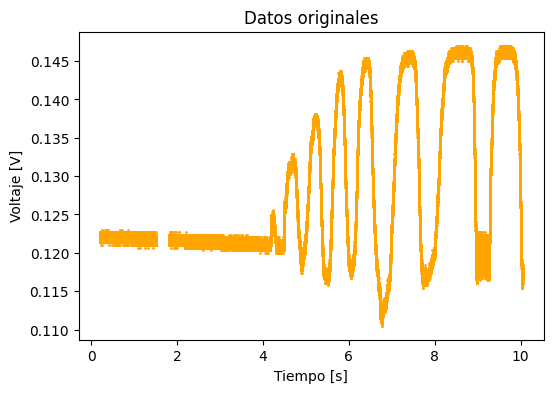

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(df["t"], df["V"], '.', markersize=2, color="orange")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Datos originales")
plt.show()

# Seleccionar los últimos puntos para el ajuste lineal (por ejemplo, últimos 20% de los datos)
fraction = 0.2
n_points = int(len(df) * fraction)
df_tail = df.iloc[-n_points:]

# Ajuste lineal (mínimos cuadrados)
p = np.polyfit(df_tail["t"], df_tail["V"], 1)  # p[0] es la pendiente, p[1] es la intersección

# Crear la recta ajustada
recta_ajustada = np.polyval(p, df["t"])

# Restar la recta ajustada a los datos originales
df["V1_corregido"] = df["V"] - recta_ajustada